In [1]:
#!pip install fastai

In [1]:
# CUDAnano
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
#import torch

In [3]:
#device = torch.device('cuda')

In [4]:
from __future__ import division, unicode_literals 

import pandas as pd
import numpy as np
import time, sys, os, re, gc
import datetime, pickle, bz2
import getpass
from tqdm import tqdm
import datetime
from datetime import datetime
import random
from string import punctuation

# Import BeautifulSoup
from bs4 import BeautifulSoup
import re

In [5]:
import fastai
fastai.__version__

'2.7.10'

In [6]:
from fastai.text.all import *

In [7]:
ma_pos_10K = pickle.load(open("ma_pos_10K.pkl", "rb"))
ma_neg_10K = pickle.load(open("ma_neg_10K.pkl", "rb"))

In [8]:
ma_pos_10K['Label'] = "Pos"
ma_neg_10K['Label'] = "Neg"

In [9]:
ma_trn_10_K  = pd.concat([ma_pos_10K, ma_neg_10K])

In [10]:
ma_trn_10_K.reset_index(drop = True, inplace = True)

In [12]:
print(ma_trn_10_K.shape)
ma_trn_10_K.head()

(1119, 3)


,Ticker,Text,Label
0,AACI,"item 7. management’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report. references to the “company,” “us” or “we” refer to armada acquisition corp. i. cautionary note regarding forward-looking statements this annual report on form 10-k includes forward-looking statements within the meaning of section 27a of the securities act of 1933, as amended, and se...",Pos
1,AAL,"item 7. on august 26, 2010, the federal aviation administration (faa) proposed a $24.2 million civil penalty against american, claiming that american failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the mcdonnell douglas md-80 aircraft auxiliary hydraulic pump. american plans to challenge the proposed civil penalty. the company has concluded that the amount of the penalty, if any, that may be paid is not estimable at december 31, 2010. gds discussion over the past several years, american has been developing a direct connection techn...",Pos
2,AAP,"item 7. management's discussion and analysis of financial condition and results of operations, of this annual report on form 10-k. in addition, selected financial data for our segments is available in note 21, segment and related information, of the notes to consolidated financial statements, included in item 15. exhibits, financial statement schedules, of this annual report on form 10-k. aap segment at january 2, 2010, we operated 3,264 aap stores within the united states, puerto rico and the virgin islands. we operated 3,238 stores throughout 39 states in the northeastern, southeastern a...",Pos
3,ABC,"item 7. 16 item 8. financial statements and supplementary data report of ernst & young llp, independent auditors to the board of directors and stockholders of amerisource health corporation we have audited the accompanying consolidated balance sheets of amerisource health corporation and subsidiaries as of september 30, 2000 and 1999, and the related consolidated statements of operations, changes in stockholders' equity, and cash flows for each of the three years in the period ended september 30, 2000. our audits also included the financial statement schedules listed in the index at item 1...",Pos
4,ACEV,"item 7.a. quantitative and qualitative disclosure about market risk. 39 item 8. financial statements and supplementary data 40 item 9. changes in and disagreements with accountants on accounting and financial disclosure. 41 item 9.a. controls and procedures. 41 item 9.b. other information. 41 part iii. 42 item 10. directors, executive officer and corporate governance. 42 item 11. executive compensation. 51 item 12. security ownership of certain beneficial owners and management and related stockholder matters. 52 item 13. certain relationships and related transactions, and director independ...",Pos


# remove punctuations

In [13]:
def remove_punct(text):
    for punctuations in punctuation:
        text = text.replace(punctuations, '')
    return text

In [117]:
ma_trn_10_K['Text'] = ma_trn_10_K['Text'].apply(remove_punct)

In [118]:
ma_trn_10_K.head()

,Ticker,Text,Label
0,AACI,item 7 management’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “company” “us” or “we” refer to armada acquisition corp i cautionary note regarding forwardlooking statements this annual report on form 10k includes forwardlooking statements within the meaning of section 27a of the securities act of 1933 as amended and section 21e ...,Pos
1,AAL,item 7 on august 26 2010 the federal aviation administration faa proposed a 242 million civil penalty against american claiming that american failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the mcdonnell douglas md80 aircraft auxiliary hydraulic pump american plans to challenge the proposed civil penalty the company has concluded that the amount of the penalty if any that may be paid is not estimable at december 31 2010 gds discussion over the past several years american has been developing a direct connection technology designed t...,Pos
2,AAP,item 7 managements discussion and analysis of financial condition and results of operations of this annual report on form 10k in addition selected financial data for our segments is available in note 21 segment and related information of the notes to consolidated financial statements included in item 15 exhibits financial statement schedules of this annual report on form 10k aap segment at january 2 2010 we operated 3264 aap stores within the united states puerto rico and the virgin islands we operated 3238 stores throughout 39 states in the northeastern southeastern and midwestern regions...,Pos
3,ABC,item 7 16 item 8 financial statements and supplementary data report of ernst young llp independent auditors to the board of directors and stockholders of amerisource health corporation we have audited the accompanying consolidated balance sheets of amerisource health corporation and subsidiaries as of september 30 2000 and 1999 and the related consolidated statements of operations changes in stockholders equity and cash flows for each of the three years in the period ended september 30 2000 our audits also included the financial statement schedules listed in the index at item 14a these fi...,Pos
4,ACEV,item 7a quantitative and qualitative disclosure about market risk 39 item 8 financial statements and supplementary data 40 item 9 changes in and disagreements with accountants on accounting and financial disclosure 41 item 9a controls and procedures 41 item 9b other information 41 part iii 42 item 10 directors executive officer and corporate governance 42 item 11 executive compensation 51 item 12 security ownership of certain beneficial owners and management and related stockholder matters 52 item 13 certain relationships and related transactions and director independence 53 item 14 princi...,Pos


In [120]:
ma_trn_10_K = ma_trn_10_K[[len(i)> 1000 for i in ma_trn_10_K.Text]]

In [121]:
ma_trn_10_K.shape

(1090, 3)

# split traning and validation

In [122]:
#split training and validation 80/20 by label
ma_trn_10_K['Is_Valid'] = False

for i in ["Pos", "Neg"]:
    i_idx = list(ma_trn_10_K.index[ma_trn_10_K.Label == i])
    random.seed(1234)
    i_20 = random.sample(i_idx, int(len(i_idx) * 0.2))  
    ma_trn_10_K = ma_trn_10_K.copy()
    ma_trn_10_K.loc[i_20, 'Is_Valid'] = True

In [123]:
ma_trn_10_K.Is_Valid.value_counts()

False    873
True     217
Name: Is_Valid, dtype: int64

# MASK NER

In [14]:
#!python -m spacy download en_core_web_lg

In [6]:
# import spacy
# from spacy.language import Language
# from spacy.tokens import Span
# from spacy.pipeline import EntityRuler
# from spacy.util import filter_spans
# from spacy.pipeline import merge_entities

In [7]:
#!pip install thinc_gpu_ops

In [8]:
#!pip install -U 'spacy[cuda-autodetect]'

In [9]:
# import cupy
# a = cupy.zeros((5, 5))
# a

(array([571., 285., 155.,  42.,  22.,   8.,   5.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.28800000e+03, 1.24135050e+05, 2.46982100e+05, 3.69829150e+05,
        4.92676200e+05, 6.15523250e+05, 7.38370300e+05, 8.61217350e+05,
        9.84064400e+05, 1.10691145e+06, 1.22975850e+06, 1.35260555e+06,
        1.47545260e+06, 1.59829965e+06, 1.72114670e+06, 1.84399375e+06,
        1.96684080e+06, 2.08968785e+06, 2.21253490e+06, 2.33538195e+06,
        2.45822900e+06]),
 <BarContainer object of 20 artists>)

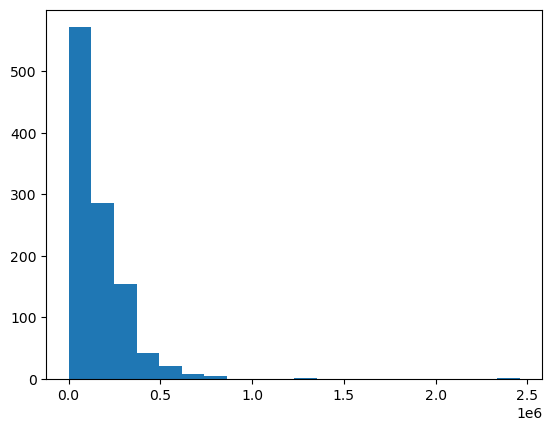

In [125]:
plt.hist([len(i) for i in ma_trn_10_K.Text], bins =20)

In [135]:
ma_trn_10_K.tail()

,Ticker,Text,Label,Is_Valid
1114,XPO,item 7 management’s discussion and analysis of financial condition and results of operations you should read the following discussion in conjunction with part i including matters set forth under item 1a “risk factors” of this annual report and our audited consolidated financial statements and notes thereto included elsewhere in this annual report the following discussion contains forwardlooking statements you should refer to the “cautionary statement regarding forwardlooking statements” set forth in part i of this annual report executive summary xpo logistics inc a delaware corporation the...,Neg,True
1115,YELP,item 7 management’s discussion and analysis of financial condition and results of operationsthe following discussion and analysis of our financial condition and results of operations should be read in conjunction with our consolidated financial statements and related notes appearing elsewhere in this annual report this discussion contains forwardlooking statements that reflect our plans estimates and beliefs and involve risks and uncertainties our actual results and the timing of certain events could differ materially from those anticipated in these forwardlooking statements as a result of...,Neg,False
1116,YUM,item 7management’s discussion and analysis of financial condition and results of operationsintroduction and overviewthe following management’s discussion and analysis “mda” should be read in conjunction with the consolidated financial statements “financial statements” in item 8 and the forwardlooking statements and the risk factors set forth in item 1a all note references herein refer to the notes to the financial statements tabular amounts are displayed in millions of us dollars except per share and unit count amounts or as otherwise specifically identified unless otherwise stated financi...,Neg,False
1117,ZEST,item 7 management’s discussion and analysis of financial condition and results of operations the following management’s discussion and analysis of financial condition and results of operations describes the principal factors affecting the results of our operations financial condition and changes in financial condition this discussion should be read in conjunction with the accompanying audited financial statements and notes thereto included elsewhere in this report the information contained in this discussion is subject to a number of risks and uncertainties we urge you to review carefully ...,Neg,False
1118,ZUMZ,item 7 management’s discussion and analysis of financial condition and results of operations the following discussion and analysis of our financial condition and results of operations should be read in conjunction with our consolidated financial statements and related notes included elsewhere in this document this discussion contains forwardlooking statements that involve risks and uncertainties our actual results could differ materially from those anticipated in these forwardlooking statements as a result of certain factors including those discussed in “item 1a risk factors” see the cauti...,Neg,False


In [127]:
max([len(i) for i in ma_trn_10_K.Text])

2458229

In [136]:
ma_trn_10_K.reset_index(drop = True, inplace = True)

In [139]:
ma_trn_10_K.tail()

,Ticker,Text,Label,Is_Valid
1085,XPO,item 7 management’s discussion and analysis of financial condition and results of operations you should read the following discussion in conjunction with part i including matters set forth under item 1a “risk factors” of this annual report and our audited consolidated financial statements and notes thereto included elsewhere in this annual report the following discussion contains forwardlooking statements you should refer to the “cautionary statement regarding forwardlooking statements” set forth in part i of this annual report executive summary xpo logistics inc a delaware corporation the...,Neg,True
1086,YELP,item 7 management’s discussion and analysis of financial condition and results of operationsthe following discussion and analysis of our financial condition and results of operations should be read in conjunction with our consolidated financial statements and related notes appearing elsewhere in this annual report this discussion contains forwardlooking statements that reflect our plans estimates and beliefs and involve risks and uncertainties our actual results and the timing of certain events could differ materially from those anticipated in these forwardlooking statements as a result of...,Neg,False
1087,YUM,item 7management’s discussion and analysis of financial condition and results of operationsintroduction and overviewthe following management’s discussion and analysis “mda” should be read in conjunction with the consolidated financial statements “financial statements” in item 8 and the forwardlooking statements and the risk factors set forth in item 1a all note references herein refer to the notes to the financial statements tabular amounts are displayed in millions of us dollars except per share and unit count amounts or as otherwise specifically identified unless otherwise stated financi...,Neg,False
1088,ZEST,item 7 management’s discussion and analysis of financial condition and results of operations the following management’s discussion and analysis of financial condition and results of operations describes the principal factors affecting the results of our operations financial condition and changes in financial condition this discussion should be read in conjunction with the accompanying audited financial statements and notes thereto included elsewhere in this report the information contained in this discussion is subject to a number of risks and uncertainties we urge you to review carefully ...,Neg,False
1089,ZUMZ,item 7 management’s discussion and analysis of financial condition and results of operations the following discussion and analysis of our financial condition and results of operations should be read in conjunction with our consolidated financial statements and related notes included elsewhere in this document this discussion contains forwardlooking statements that involve risks and uncertainties our actual results could differ materially from those anticipated in these forwardlooking statements as a result of certain factors including those discussed in “item 1a risk factors” see the cauti...,Neg,False


In [140]:
pickle.dump(ma_trn_10_K, open("ma_trn_10_K.pkl", "wb"))

In [5]:
ma_trn_10_K = pickle.load(open("ma_trn_10_K.pkl", "rb"))

In [6]:
import spacy

spacy.prefer_gpu()
nlp = spacy.load('en_core_web_lg')
nlp.add_pipe("merge_entities")
nlp.max_length = 3000000

In [7]:
%%time

ma_trn_10_K_NER = []
for i in tqdm(range(len(ma_trn_10_K))):
    doc_i = nlp(ma_trn_10_K.Text[i], disable=["tagger", "attribute_ruler", "lemmatizer"]) 
    ma_trn_10_K_NER.append(" ".join([t.text if not t.ent_type_ else t.ent_type_ for t in doc_i]))

100%|██████████| 1090/1090 [45:25<00:00,  2.50s/it] 

CPU times: user 44min 47s, sys: 41.5 s, total: 45min 29s
Wall time: 45min 25s


In [8]:
ma_trn_10_K["Text"] = ma_trn_10_K_NER

In [11]:
ma_trn_10_K.head()

,Ticker,Text,Label,Is_Valid
0,AACI,item CARDINAL management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to ORG i cautionary note regarding forwardlooking statements this annual report on form CARDINAL includes forwardlooking statements within the meaning of LAW of the securities act of DATE as amended and LAW of the securitie...,Pos,False
1,AAL,item CARDINAL on DATE the federal aviation administration ORG proposed a CARDINAL civil penalty against NORP claiming that NORP failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the ORG ORG aircraft auxiliary hydraulic pump NORP plans to challenge the proposed civil penalty the company has concluded that the amount of the penalty if any that may be paid is not estimable at DATE gds discussion over DATE NORP has been developing a direct connection technology designed to distribute its fare content and bookings capability directly to t...,Pos,False
2,AAP,item CARDINAL managements discussion and analysis of financial condition and results of operations of this annual report on form CARDINAL in addition selected financial data for our segments is available in note CARDINAL segment and related information of the notes to consolidated financial statements included in item CARDINAL exhibits financial statement schedules of this annual report on form CARDINAL aap segment at DATE we operated CARDINAL ORG stores within GPE GPE and GPE we operated CARDINAL stores throughout CARDINAL states in the northeastern southeastern and midwestern regions of ...,Pos,False
3,ABC,item CARDINAL item CARDINAL financial statements and supplementary data report of ORG young llp independent auditors to the board of directors and stockholders of ORG we have audited the accompanying consolidated balance sheets of ORG as of DATE and DATE and the related consolidated statements of operations changes in stockholders equity and cash flows for each of DATE in the period ended DATE our audits also included the financial statement schedules listed in the index at item CARDINAL these financial statements and schedules are the responsibility of the companys management our respon...,Pos,False
4,ACEV,item CARDINAL quantitative and qualitative disclosure about market risk CARDINAL item CARDINAL financial statements and supplementary data CARDINAL item CARDINAL changes in and disagreements with accountants on accounting and financial disclosure CARDINAL item CARDINAL controls and procedures CARDINAL item CARDINAL other information CARDINAL part iii CARDINAL item CARDINAL directors executive officer and corporate governance CARDINAL item CARDINAL executive compensation CARDINAL item CARDINAL security ownership of certain beneficial owners and management and related stockholder matters CAR...,Pos,False


In [13]:
del ma_trn_10_K_NER
gc.collect()

9

In [ ]:
# STOPWORDS = nltk.corpus.stopwords.words('english')

# filters = [ '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/',  '\\', ':', ';', '<', '=', '>',
#            '?', '@', '[', ']', '^', '_', '`', '{', '|', '}', '\~', '\t','\\n',"'",",",'~' , '—']

# def preprocess_text(input_strs , filters=None , stopwords=STOPWORDS):
#     """
#         * filter punctuation
#         * to_lower
#         * remove stop words (from nltk corpus)
#         * remove multiple spaces with one
#         * remove leading spaces    
#     """
    
#     # filter punctuation and case conversion
#     input_strs = input_strs.str.replace_multi(filters, ' ', regex=False)
#     input_strs = input_strs.str.lower()
        
#     # remove stopwords
#     stopwords_gpu = nvstrings.to_device(stopwords)
#     input_strs = nvtext.replace_tokens(input_strs.data, stopwords_gpu, ' ')
#     input_strs = cudf.Series(input_strs)
        
#     # replace multiple spaces with single one and strip leading/trailing spaces
#     input_strs = input_strs.str.replace(r"\s+", ' ', regex=True)
#     input_strs = input_strs.str.strip(' ')
    
#     doc = nlp(input_strs) 

#     return " ".join([t.text if not t.ent_type_ else t.ent_type_ for t in doc])       

In [60]:
ma_trn_10_K.head()

,Ticker,Text,Label,Is_Valid
0,AACI,item CARDINAL management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to ORG i cautionary note regarding forwardlooking statements this annual report on form CARDINAL includes forwardlooking statements within the meaning of LAW of the securities act of DATE as amended and LAW of the securitie...,Pos,False
1,AAL,item CARDINAL on DATE the federal aviation administration ORG proposed a CARDINAL civil penalty against NORP claiming that NORP failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the ORG ORG aircraft auxiliary hydraulic pump NORP plans to challenge the proposed civil penalty the company has concluded that the amount of the penalty if any that may be paid is not estimable at DATE gds discussion over DATE NORP has been developing a direct connection technology designed to distribute its fare content and bookings capability directly to t...,Pos,False
2,AAP,item CARDINAL managements discussion and analysis of financial condition and results of operations of this annual report on form CARDINAL in addition selected financial data for our segments is available in note CARDINAL segment and related information of the notes to consolidated financial statements included in item CARDINAL exhibits financial statement schedules of this annual report on form CARDINAL aap segment at DATE we operated CARDINAL ORG stores within GPE GPE and GPE we operated CARDINAL stores throughout CARDINAL states in the northeastern southeastern and midwestern regions of ...,Pos,False
3,ABC,item CARDINAL item CARDINAL financial statements and supplementary data report of ORG young llp independent auditors to the board of directors and stockholders of ORG we have audited the accompanying consolidated balance sheets of ORG as of DATE and DATE and the related consolidated statements of operations changes in stockholders equity and cash flows for each of DATE in the period ended DATE our audits also included the financial statement schedules listed in the index at item CARDINAL these financial statements and schedules are the responsibility of the companys management our respon...,Pos,False
4,ACEV,item CARDINAL quantitative and qualitative disclosure about market risk CARDINAL item CARDINAL financial statements and supplementary data CARDINAL item CARDINAL changes in and disagreements with accountants on accounting and financial disclosure CARDINAL item CARDINAL controls and procedures CARDINAL item CARDINAL other information CARDINAL part iii CARDINAL item CARDINAL directors executive officer and corporate governance CARDINAL item CARDINAL executive compensation CARDINAL item CARDINAL security ownership of certain beneficial owners and management and related stockholder matters CAR...,Pos,False


In [ ]:
ma_trn_10_K['Text'] = [i.lower() for i in ma_trn_10_K.Text]

In [64]:
ma_trn_10_K.head()

,Ticker,Text,Label,Is_Valid
0,AACI,item cardinal management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to org i cautionary note regarding forwardlooking statements this annual report on form cardinal includes forwardlooking statements within the meaning of law of the securities act of date as amended and law of the securitie...,Pos,False
1,AAL,item cardinal on date the federal aviation administration org proposed a cardinal civil penalty against norp claiming that norp failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the org org aircraft auxiliary hydraulic pump norp plans to challenge the proposed civil penalty the company has concluded that the amount of the penalty if any that may be paid is not estimable at date gds discussion over date norp has been developing a direct connection technology designed to distribute its fare content and bookings capability directly to t...,Pos,False
2,AAP,item cardinal managements discussion and analysis of financial condition and results of operations of this annual report on form cardinal in addition selected financial data for our segments is available in note cardinal segment and related information of the notes to consolidated financial statements included in item cardinal exhibits financial statement schedules of this annual report on form cardinal aap segment at date we operated cardinal org stores within gpe gpe and gpe we operated cardinal stores throughout cardinal states in the northeastern southeastern and midwestern regions of ...,Pos,False
3,ABC,item cardinal item cardinal financial statements and supplementary data report of org young llp independent auditors to the board of directors and stockholders of org we have audited the accompanying consolidated balance sheets of org as of date and date and the related consolidated statements of operations changes in stockholders equity and cash flows for each of date in the period ended date our audits also included the financial statement schedules listed in the index at item cardinal these financial statements and schedules are the responsibility of the companys management our respon...,Pos,False
4,ACEV,item cardinal quantitative and qualitative disclosure about market risk cardinal item cardinal financial statements and supplementary data cardinal item cardinal changes in and disagreements with accountants on accounting and financial disclosure cardinal item cardinal controls and procedures cardinal item cardinal other information cardinal part iii cardinal item cardinal directors executive officer and corporate governance cardinal item cardinal executive compensation cardinal item cardinal security ownership of certain beneficial owners and management and related stockholder matters car...,Pos,False


In [61]:
ner_leb = [len(i) for i in ma_trn_10_K.Text]

In [62]:
max(ner_leb)

2383309

(array([334., 240., 163., 127.,  96.,  56.,  26.,  13.,   7.,  14.,   5.,
          3.,   1.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.33400000e+03, 6.08833750e+04, 1.20432750e+05, 1.79982125e+05,
        2.39531500e+05, 2.99080875e+05, 3.58630250e+05, 4.18179625e+05,
        4.77729000e+05, 5.37278375e+05, 5.96827750e+05, 6.56377125e+05,
        7.15926500e+05, 7.75475875e+05, 8.35025250e+05, 8.94574625e+05,
        9.54124000e+05, 1.01367338e+06, 1.07322275e+06, 1.13277212e+06,
        1.19232150e+06, 1.25187088e+06, 1.31142025e+06, 1.37096962e+06,
        1.43051900e+06, 1.49006838e+06, 1.54961775e+06, 1.60916712e+06,
        1.66871650e+06, 1.72826588e+06, 1.78781525e+06, 1.84736462e+06,
        1.90691400e+06, 1.96646338e+06, 2.02601275e+06, 2.08556212e+06,
        2.14511150e+06, 2.20466088e+06, 2.26421025e+06, 2.32375962e+06,
      

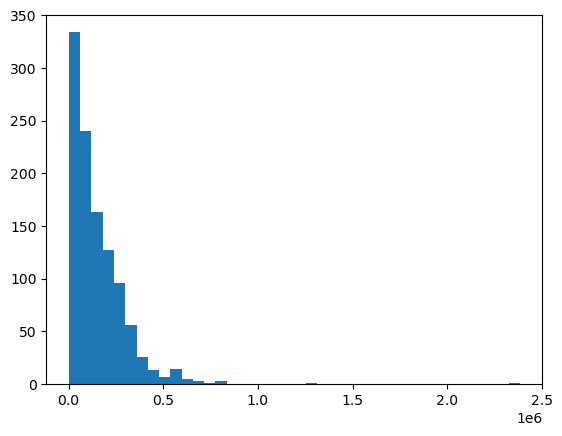

In [65]:
plt.hist(ner_leb, bins =40)

In [67]:
pickle.dump(ma_trn_10_K, open("ma_trn_10_K_NER.pkl", "wb"))

In [4]:
ma_trn_10_K = pickle.load(open("ma_trn_10_K_NER.pkl", "rb"))

In [17]:
ma_trn_10_K["input"] = [i[:100000] for i in ma_trn_10_K.Text] #get the first 100K characters

# load text data

In [8]:
df_tok, count = tokenize_df(ma_trn_10_K, ['input'])

In [9]:
pickle.dump((df_tok, count), open("ma_trn_token_vocab.pkl", "wb"))

In [5]:
_, count = pickle.load(open("ma_trn_token_vocab.pkl", "rb"))

In [35]:
df_tok.head()

,Ticker,Text,Label,Is_Valid,text,text_length
0,AACI,item cardinal management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to org i cautionary note regarding forwardlooking statements this annual report on form cardinal includes forwardlooking statements within the meaning of law of the securities act of date as amended and law of the securitie...,Pos,False,"[xxbos, item, cardinal, management, ’s, discussion, and, analysis, of, financial, condition, and, results, of, operations, the, following, discussion, and, analysis, of, the, company, ’s, financial, condition, and, results, of, operations, should, be, read, in, conjunction, with, the, financial, statements, and, the, notes, thereto, contained, elsewhere, in, this, report, references, to, the, “, company, ”, “, us, ”, or, “, we, ”, refer, to, org, i, cautionary, note, regarding, forwardlooking, statements, this, annual, report, on, form, cardinal, includes, forwardlooking, statements, withi...",16049
1,AAL,item cardinal on date the federal aviation administration org proposed a cardinal civil penalty against norp claiming that norp failed to properly perform certain portions of an faa airworthiness directive concerning certain wiring to the org org aircraft auxiliary hydraulic pump norp plans to challenge the proposed civil penalty the company has concluded that the amount of the penalty if any that may be paid is not estimable at date gds discussion over date norp has been developing a direct connection technology designed to distribute its fare content and bookings capability directly to t...,Pos,False,"[xxbos, item, cardinal, on, date, the, federal, aviation, administration, org, proposed, a, cardinal, civil, penalty, against, norp, claiming, that, norp, failed, to, properly, perform, certain, portions, of, an, faa, airworthiness, directive, concerning, certain, wiring, to, the, org, org, aircraft, auxiliary, hydraulic, pump, norp, plans, to, challenge, the, proposed, civil, penalty, the, company, has, concluded, that, the, amount, of, the, penalty, if, any, that, may, be, paid, is, not, estimable, at, date, gds, discussion, over, date, norp, has, been, developing, a, direct, connection,...",11302
2,AAP,item cardinal managements discussion and analysis of financial condition and results of operations of this annual report on form cardinal in addition selected financial data for our segments is available in note cardinal segment and related information of the notes to consolidated financial statements included in item cardinal exhibits financial statement schedules of this annual report on form cardinal aap segment at date we operated cardinal org stores within gpe gpe and gpe we operated cardinal stores throughout cardinal states in the northeastern southeastern and midwestern regions of ...,Pos,False,"[xxbos, item, cardinal, managements, discussion, and, analysis, of, financial, condition, and, results, of, operations, of, this, annual, report, on, form, cardinal, in, addition, selected, financial, data, for, our, segments, is, available, in, note, cardinal, segment, and, related, information, of, the, notes, to, consolidated, financial, statements, included, in, item, cardinal, exhibits, financial, statement, schedules, of, this, annual, report, on, form, cardinal, aap, segment, at, date, we, operated, cardinal, org, stores, within, gpe, gpe, and, gpe, we, operated, cardinal, stores, t...",15425
3,ABC,item cardinal item cardinal financial statements and supplementary data report of org young llp independent auditors to the board of directors and stockholders of org we have audited the accompanying consolidated balance sheets of org as of date and date and the related conso

# load LM data

In [10]:
dls_lm = TextDataLoaders.from_df(ma_trn_10_K, path = '.', vocab = make_vocab(count), text_col= 'input', is_lm = True, 
                                 bs = 64, device=torch.device('cuda'))

In [11]:
dls_lm.show_batch(max_n=2)

,text,text_
0,xxbos item cardinal management ’s discussion and analysis of financial condition and results of operations incorporated by reference from exhibit cardinal annual report section entitled “ management ’s discussion and analysis of financial condition and results of operations ” item cardinal quantitative and qualitative disclosures about market risk incorporated by reference from exhibit cardinal annual report section entitled “ market risk ” item cardinal financial statements and supplementary data incorporated by reference,item cardinal management ’s discussion and analysis of financial condition and results of operations incorporated by reference from exhibit cardinal annual report section entitled “ management ’s discussion and analysis of financial condition and results of operations ” item cardinal quantitative and qualitative disclosures about market risk incorporated by reference from exhibit cardinal annual report section entitled “ market risk ” item cardinal financial statements and supplementary data incorporated by reference from
1,that are not expected to recur the loss on extinguishment of debt in date represents the cardinal make whole payment related to settlement of the mortgage on our corporate campus that was sold during date our net miscellaneous income consists of our earnings of joint venture investments royalty income gains and losses related to foreign exchange transactions and realized gains and impairments of other investments the majority of miscellaneous income is attributable,are not expected to recur the loss on extinguishment of debt in date represents the cardinal make whole payment related to settlement of the mortgage on our corporate campus that was sold during date our net miscellaneous income consists of our earnings of joint venture investments royalty income gains and losses related to foreign exchange transactions and realized gains and impairments of other investments the majority of miscellaneous income is attributable to


In [46]:
len(dls_lm.vocab), len(dls_lm.train)

(34384, 2218)

In [47]:
dls_lm.vocab[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 'the']

In [12]:
pickle.dump(dls_lm, open("dls_lm.pkl", "wb"))

# train language model

In [13]:
learn = language_model_learner(dls_lm, AWD_LSTM , metrics=[accuracy, Perplexity()], path=".", wd=0.1).to_fp16()

In [ ]:
callback_lm = SaveModelCallBack(learn, minitor="accuracy", mode="max", name = "Best_SEC_LM") 

In [14]:
%%time 

learn.fit_one_cycle(1, 0.003, moms = (0.8, 0.7, 0.8), callbacks = [callback_lm])

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.184661,3.896935,0.312333,49.251263,31:20


In [ ]:
#learn.fit_one_cycle(1, 0.003, moms = (0.8, 0.7, 0.8)) 
           
#      epoch	train_loss	valid_loss	accuracy	perplexity	time
# :180000  0	4.835928	3.276992	0.471030	26.495962	5:31:13
# :100000  0	4.840034	3.239537	0.528664	25.521891	5:42:26

In [15]:
learn.save_encoder('finetuned_LM_0')

SuggestedLRs(minimum=0.005754399299621582, steep=3.311311274956097e-06, valley=0.0063095735386013985, slide=0.004365158267319202)

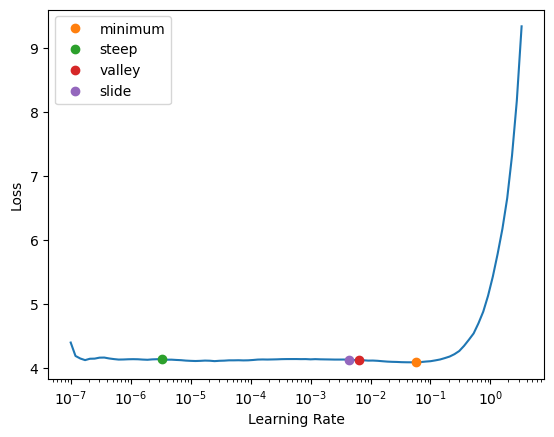

In [16]:
#finding the learning rate for language learner
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide)) #use valley as LR

In [17]:
TEXT = 'the net loss of'
N_WORDS = 50
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)]
print('\n'.join(preds)) #repeating pattern

the net loss of surplus in this period is above cardinal of the estimated net loss for the period of date cardinal of the net loss in the date consisting of net income and losses from credit losses primarily from discontinued operations in date on date of the decrease in operating income cardinal the
the net loss of cardinal tax credits from intentional violations of law of the law of the act of date and date law of the state of org contributed cardinal tax expense and income taxes other than the pretax income in date and date respectively the tax rate was cardinal for date compared to


In [22]:
#https://github.com/fastai/fastai2/blob/master/fastai2/callback/schedule.py#L151
learn.fine_tune(epochs=5) # base_lr = 0.0063

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.035351,3.844885,0.317821,46.753311,31:30


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.779136,3.632834,0.341033,37.819843,32:51
1,3.675510,3.510386,0.355176,33.461197,32:03
2,3.528002,3.443253,0.363280,31.288561,30:52
3,3.522334,3.408198,0.367454,30.210752,30:37
4,3.509359,3.401062,0.368486,29.995953,31:52


In [23]:
TEXT = 'the net loss of'
N_WORDS = 50
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)]
print('\n'.join(preds))

the net loss of operations for date the period ended date was primarily attributed to the release of cardinal of net income from operations in date and an increase in the net loss of cardinal from org in date the net loss is the result of cardinal components of the net loss date in
the net loss of income in date and the income tax benefit of cardinal and the impact of the reclassification of tax attributes related to the adoption of the created tax cuts and jobs act date cash and cash equivalents and restricted cash were used as cash provided by operating activities of cardinal the


In [24]:
learn.save_encoder('finetuned_LM_1')

In [25]:
learn.show_results(max_n=2)

,input,target,pred
0,xxbos item cardinal “ management ’s discussion and analysis of financial condition and results of operations ” we provide an overview of the impact that macroeconomic conditions had on our operations and in org in date we also continued to expand both the breadth and the depth of our products and services through the integration of new and expanded product lines designed to create additional scale advantages see “ strategic acquisitions expansion,item cardinal “ management ’s discussion and analysis of financial condition and results of operations ” we provide an overview of the impact that macroeconomic conditions had on our operations and in org in date we also continued to expand both the breadth and the depth of our products and services through the integration of new and expanded product lines designed to create additional scale advantages see “ strategic acquisitions expansion and,item cardinal management management ’s discussion and analysis of financial condition and results of operations ” the have a understanding of our company of our conditions and on our business and financial the ’s date we announced announced to focus our our global of breadth breadth of our business and services and our introduction of our products existing products offerings and to enhance new functionality and and “ item initiatives ” ”
1,– cardinal at date and is well within the policy limit of cardinal as are measures at all other shock levels liquidity liquidity is measured by a financial institution ’s ability to raise funds through loan and lease repayments maturing investments deposit growth borrowed funds capital and the sale of highly marketable assets such as investment securities and residential mortgage loans the company ’s liquidity position considering both internal and external sources,cardinal at date and is well within the policy limit of cardinal as are measures at all other shock levels liquidity liquidity is measured by a financial institution ’s ability to raise funds through loan and lease repayments maturing investments deposit growth borrowed funds capital and the sale of highly marketable assets such as investment securities and residential mortgage loans the company ’s liquidity position considering both internal and external sources available,the – date and date expected as the range of of cardinal the of the of date of times scenarios the and and not at the weighted institution that ability to meet capital through its and security agreements and in and accounts and funds and expenditures capital ability of loans liquid securities and as cash securities and securities mortgage loans the company ’s primary is is the the and external sources of
2,outlook during date we intend to continue to invest in new products and programs new features for our existing products and it infrastructure to scale and operate effectively to meet our strategic objectives we have used cash to acquire businesses and technologies and we anticipate that we may continue to do so in the future the nature of these transactions makes it difficult to predict the amount and timing of such cash,during date we intend to continue to invest in new products and programs new features for our existing products and it infrastructure to scale and operate effectively to meet our strategic objectives we have used cash to acquire businesses and technologies and we anticipate that we may continue to do so in the future the nature of these transactions makes it difficult to predict the amount and timing of such cash requirements,the date the announced to continue to invest in the products and services to products and our products products and services will to improve our improve our in meet our needs needs we expect also our and fund and and businesses that to expect that our will continue to invest so in the future we following of our initiatives will it difficult for predict the timing of timing of future cash flows


# find best LR and losses

In [29]:
#learn.lr_find()

In [30]:
#learn.record.plot(suggestion = True)

In [31]:
#min_lm_lr = learn.recorder.min_grad_lr

In [32]:
#learn.recorder.val_losses[-1]

In [ ]:
#learn.recorder.metrics[0]

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, 1e-3,moms=(0.8,0.7))

In [ ]:
learn.save_encoder('finetuned_LM_2')

# train a classifer

* https://docs.fast.ai/text.data.html


In [52]:
df_tok.head(1)

,Ticker,Text,Label,Is_Valid,text,text_length
0,AACI,item cardinal management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to org i cautionary note regarding forwardlooking statements this annual report on form cardinal includes forwardlooking statements within the meaning of law of the securities act of date as amended and law of the securitie...,Pos,False,"[xxbos, item, cardinal, management, ’s, discussion, and, analysis, of, financial, condition, and, results, of, operations, the, following, discussion, and, analysis, of, the, company, ’s, financial, condition, and, results, of, operations, should, be, read, in, conjunction, with, the, financial, statements, and, the, notes, thereto, contained, elsewhere, in, this, report, references, to, the, “, company, ”, “, us, ”, or, “, we, ”, refer, to, org, i, cautionary, note, regarding, forwardlooking, statements, this, annual, report, on, form, cardinal, includes, forwardlooking, statements, withi...",16049


In [51]:
ma_trn_10_K.head(1)

,Ticker,Text,Label,Is_Valid,input
0,AACI,item cardinal management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to org i cautionary note regarding forwardlooking statements this annual report on form cardinal includes forwardlooking statements within the meaning of law of the securities act of date as amended and law of the securitie...,Pos,False,item cardinal management ’s discussion and analysis of financial condition and results of operations the following discussion and analysis of the company ’s financial condition and results of operations should be read in conjunction with the financial statements and the notes thereto contained elsewhere in this report references to the “ company ” “ us ” or “ we ” refer to org i cautionary note regarding forwardlooking statements this annual report on form cardinal includes forwardlooking statements within the meaning of law of the securities act of date as amended and law of the securitie...


In [18]:
dls_cls = TextDataLoaders.from_df(ma_trn_10_K, path = "." , vocab = make_vocab(count), bs = 50, device=torch.device('cuda'),
                                  text_col= 'input', label_col= 'Label', valid_col = "Is_Valid")

In [19]:
pickle.dump(dls_cls, open("dls_cls.pkl", "wb"))

In [6]:
dls_cls = pickle.load(open("dls_cls.pkl", "rb"))

In [20]:
learn_cls = text_classifier_learner(dls_cls, AWD_LSTM , drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)], max_len = 16000)

learn_cls = learn_cls.load_encoder('finetuned_LM_1')

In [21]:
callback_cls = SaveModelCallback(monitor='valid_loss', fname = "Best_M&A_CLS_model")

In [22]:
learn_cls.fit_one_cycle(1, 2e-3, moms = (0.8, 0.7, 0.8))

epoch,train_loss,valid_loss,accuracy,fbeta_score,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 80.00 MiB (GPU 0; 11.76 GiB total capacity; 9.23 GiB already allocated; 75.75 MiB free; 9.65 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

SuggestedLRs(valley=0.0020892962347716093)

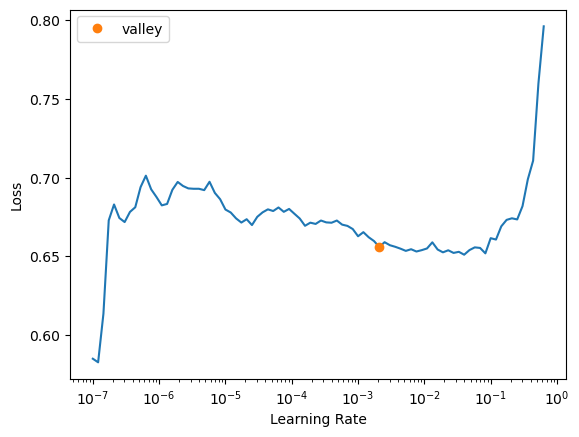

In [10]:
learn_cls.lr_find()

In [14]:
learn_cls.freeze_to(-1)
learn_cls.fit_one_cycle(1, slice(2e-3/(2.6**4),2e-3), cbs = [callback_cls])

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.702556,0.713202,0.451613,0.451613,00:44


Better model found at epoch 0 with valid_loss value: 0.7132015228271484.


In [ ]:
learn_cls.save('finetuned_CLS_2')

In [15]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(1, slice(2e-3/(2.6**4),2e-3), cbs = [callback_cls])

epoch,train_loss,valid_loss,accuracy,fbeta_score,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 102.00 MiB (GPU 0; 11.76 GiB total capacity; 9.07 GiB already allocated; 52.88 MiB free; 9.53 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
learn_cls.save('finetuned_CLS_3')

# predcit on training set

In [ ]:
pred, y, losses = learn_cls.get_preds(with_loss = True)
pred.shape

In [ ]:
interp = ClassificationIntepretation(learn_cls, preds, y, losses)

In [ ]:
interp.plot_confusion_matrix(figsize = [5,5], dpi = 1000)

In [ ]:
fpr, tpr, _ = roc_surve(y, preds[:,1], pos_label = 1)

In [ ]:
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of M&A Prediction")
plt.legend(loc="lower right")
plt.show()

# T5 long Tglobal large

* https://huggingface.co/google/long-t5-tglobal-xl

In [ ]:
from transformers import AutoTokenizer, LongT5Model

tokenizer = AutoTokenizer.from_pretrained("google/long-t5-tglobal-large")
model = LongT5Model.from_pretrained("google/long-t5-tglobal-large")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

In [ ]:
last_hidden_states = outputs.last_hidden_state